# Electric Vehicle Price Prediction Project
### Objective
To **predict the price of an Electric Vehicle (EV)** based on features such as battery capacity, range, speed, charging time, and brand.

### Why This Project?
Electric Vehicles are increasing in demand. Understanding how features affect pricing helps:
- Manufacturers decide production cost
- Customers compare EV models
- Businesses analyze market pricing trends

### Problem Statement
Given EV specifications as input, **predict the price** of the vehicle.

### Dataset Source
Dataset: *EV_cars.csv*  
Collected and stored inside `/data` folder.

### Tools & Technologies
| Area | Tech Used |
|-----|-----------|
| Programming | Python |
| Libraries | Pandas, NumPy, Matplotlib, Scikit-Learn |
| Frontend UI | Streamlit |
| Generative AI | OpenAI / Gemini for chatbot (optional) |
| Version Control | GitHub |


### What is Machine Learning?
Machine Learning is a method where computers learn patterns from data and make predictions.

### Type Used in This Project: Supervised Learning
We have:
- **Input features** → EV specs (Battery, Power, Range, etc.)
- **Output** → Price




In [3]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100


In [4]:


df = pd.read_csv("../data/EV_cars.csv")
df.head()


,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [5]:
df.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [6]:
df.shape

(360, 9)

In [7]:
df.columns

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery               360 non-null    float64
 1   Car_name              360 non-null    object 
 2   Car_name_link         360 non-null    object 
 3   Efficiency            360 non-null    int64  
 4   Fast_charge           358 non-null    float64
 5   Price.DE.             309 non-null    float64
 6   Range                 360 non-null    int64  
 7   Top_speed             360 non-null    int64  
 8   acceleration..0.100.  360 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 25.4+ KB


In [9]:
df.describe()

,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
count,360.000000,360.000000,358.000000,309.000000,360.000000,360.000000,360.000000
mean,71.187500,195.175000,552.960894,67264.284790,369.694444,180.919444,7.288889
std,20.389849,31.909429,236.864801,34508.249544,107.315514,36.232023,3.005897
min,21.300000,137.000000,170.000000,22550.000000,135.000000,125.000000,2.100000
25%,57.500000,171.000000,360.000000,45690.000000,295.000000,155.750000,4.900000
50%,71.000000,188.000000,520.000000,56942.000000,380.000000,180.000000,6.750000
75%,85.000000,208.250000,680.000000,73100.000000,446.250000,200.000000,9.000000
max,123.000000,295.000000,1290.000000,218000.000000,685.000000,320.000000,19.100000


### Understanding Dataset

I loaded the EV dataset and inspected:
- Number of rows and columns using `df.shape`
- Column data types and missing values using `df.info()`
- Summary statistics using `df.describe()`




### Week 1 Summary ✅
- Defined problem clearly
- Collected dataset
- Organized folder structure (`data/` and `notebooks/`)
- Loaded dataset in Jupyter Notebook
- Understood features and target variable


In [11]:
df.columns


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [17]:
import pandas as pd

df = pd.read_csv("../data/EV_cars.csv")

# Convert units and clean text → numbers
df['Range'] = df['Range'].astype(str).str.replace(' km', '', regex=False).astype(float)
df['Battery'] = df['Battery'].astype(str).str.replace(' kWh', '', regex=False).astype(float)
df['Top_speed'] = df['Top_speed'].astype(str).str.replace(' km/h', '', regex=False).astype(float)
df['Fast_charge'] = df['Fast_charge'].astype(str).str.replace(' km/h', '', regex=False).astype(float)
df['Efficiency'] = df['Efficiency'].astype(str).str.replace(' Wh/km', '', regex=False).astype(float)

df['Price.DE.'] = (
    df['Price.DE.']
    .astype(str)
    .str.replace('€', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

df['acceleration..0.100.'] = df['acceleration..0.100.'].astype(str).str.replace(' sec', '', regex=False).astype(float)

df.head()




,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172.0,670.0,59017.0,435.0,217.0,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137.0,700.0,46220.0,420.0,201.0,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183.0,370.0,44625.0,330.0,160.0,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171.0,630.0,39990.0,360.0,160.0,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149.0,780.0,55220.0,505.0,201.0,4.4


In [16]:
for col in df.columns:
    print(f"'{col}'")


'Battery'
'Car_name'
'Car_name_link'
'Efficiency'
'Fast_charge'
'Price.DE.'
'Range'
'Top_speed'
'acceleration..0.100.'


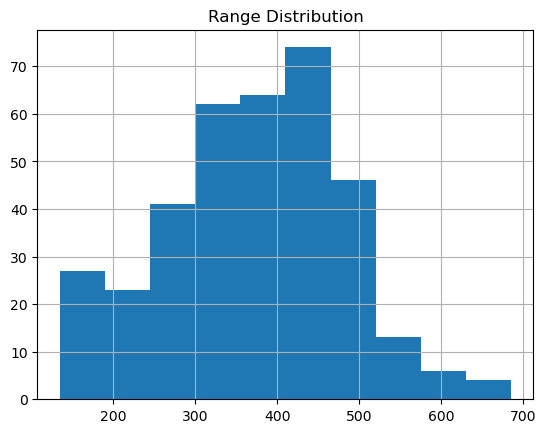

,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
Battery,1.000000,0.177427,0.597290,0.704391,0.881937,0.698193,-0.610164
Efficiency,0.177427,1.000000,-0.280822,0.179422,-0.282097,-0.176437,0.389531
Fast_charge,0.597290,-0.280822,1.000000,0.618951,0.720674,0.775925,-0.671587
Price.DE.,0.704391,0.179422,0.618951,1.000000,0.594143,0.762891,-0.537712
Range,0.881937,-0.282097,0.720674,0.594143,1.000000,0.744192,-0.744583
Top_speed,0.698193,-0.176437,0.775925,0.762891,0.744192,1.000000,-0.839394
acceleration..0.100.,-0.610164,0.389531,-0.671587,-0.537712,-0.744583,-0.839394,1.000000


In [18]:
df.describe()

import matplotlib.pyplot as plt

df['Range'].hist()
plt.title("Range Distribution")
plt.show()

df.corr(numeric_only=True)


In [20]:
df_ml = df.copy()

# Drop columns that do not help the model
df_ml = df_ml.drop(['Car_name_link'], axis=1, errors='ignore')

# One-Hot Encode Car_name (optional but improves model accuracy)
df_ml = pd.get_dummies(df_ml, columns=['Car_name'], drop_first=True)

print(df_ml.shape)
df_ml.head()



(360, 357)


,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.,Car_name_Abarth 500e Hatchback,Car_name_Aiways U5,Car_name_Aiways U6,Car_name_Audi Q4 Sportback e-tron 40,Car_name_Audi Q4 Sportback e-tron 45,Car_name_Audi Q4 Sportback e-tron 45 quattro,Car_name_Audi Q4 Sportback e-tron 50 quattro,Car_name_Audi Q4 Sportback e-tron 55 quattro,Car_name_Audi Q4 e-tron 40,Car_name_Audi Q4 e-tron 45,Car_name_Audi Q4 e-tron 45 quattro,Car_name_Audi Q4 e-tron 50 quattro,Car_name_Audi Q4 e-tron 55 quattro,Car_name_Audi Q8 e-tron 50 quattro,Car_name_Audi Q8 e-tron 55 quattro,Car_name_Audi Q8 e-tron Sportback 50 quattro,Car_name_Audi Q8 e-tron Sportback 55 quattro,Car_name_Audi SQ8 e-tron,Car_name_Audi SQ8 e-tron Sportback,Car_name_Audi e-tron GT RS,Car_name_Audi e-tron GT quattro,Car_name_BMW i4 M50,Car_name_BMW i4 eDrive35,Car_name_BMW i4 eDrive40,Car_name_BMW i5 M60 xDrive Sedan,Car_name_BMW i5 eDrive40 Sedan,Car_name_BMW i7 M70 xDrive,Car_name_BMW i7 eDrive50,Car_name_BMW i7 xDrive60,Car_name_BMW iX M60,Car_name_BMW iX xDrive40,Car_name_BMW iX xDrive50,Car_name_BMW iX1 eDrive20,Car_name_BMW iX1 xDrive30,Car_name_BMW iX2 xDrive30,Car_name_BMW iX3,Car_name_BYD ATTO 3,Car_name_BYD DOLPHIN 44.9 kWh Active,Car_name_BYD DOLPHIN 44.9 kWh Boost,Car_name_BYD DOLPHIN 60.4 kWh,Car_name_BYD HAN,Car_name_BYD SEAL 82.5 kWh AWD Excellence,Car_name_BYD SEAL 82.5 kWh RWD Design,...,Car_name_Tesla Model Y Long Range Dual Motor,Car_name_Tesla Model Y Performance,Car_name_Toyota PROACE Shuttle L 50 kWh,Car_name_Toyota PROACE Shuttle L 75 kWh,Car_name_Toyota PROACE Shuttle M 50 kWh,Car_name_Toyota PROACE Shuttle M 75 kWh,Car_name_Toyota PROACE Verso L 75 kWh,Car_name_Toyota PROACE Verso M 75 kWh,Car_name_Toyota Proace City Verso Electric L1 50 kWh,Car_name_Toyota Proace City Verso Electric L2 50 kWh,Car_name_Toyota bZ4X AWD,Car_name_Toyota bZ4X FWD,Car_name_VinFast VF 8 Eco Extended Range,Car_name_VinFast VF 8 Plus Extended Range,Car_name_VinFast VF 9 Extended Range,Car_name_Volkswagen ID. Buzz Pro,Car_name_Volkswagen ID.3 Pro,Car_name_Volkswagen ID.3 Pro S - 4 Seats,Car_name_Volkswagen ID.4 GTX,Car_name_Volkswagen ID.4 Pro,Car_name_Volkswagen ID.4 Pro 4MOTION,Car_name_Volkswagen ID.4 Pure,Car_name_Volkswagen ID.5 GTX,Car_name_Volkswagen ID.5 Pro,Car_name_Volkswagen ID.7 Pro,Car_name_Volkswagen ID.7 Pro S,Car_name_Volvo C40 Recharge Single Motor,Car_name_Volvo C40 Recharge Single Motor ER,Car_name_Volvo C40 Recharge Twin Motor,Car_name_Volvo EX30 Single Motor,Car_name_Volvo EX30 Single Motor ER,Car_name_Volvo EX30 Twin Motor Performance,Car_name_Volvo EX90 Single Motor,Car_name_Volvo EX90 Twin Motor,Car_name_Volvo EX90 Twin Motor Performance,Car_name_Volvo XC40 Recharge Single Motor,Car_name_Volvo XC40 Recharge Single Motor ER,Car_name_Volvo XC40 Recharge Twin Motor,Car_name_XPENG G9 AWD Performance,Car_name_XPENG G9 RWD Long Range,Car_name_XPENG G9 RWD Standard Range,Car_name_XPENG P7 AWD Performance,Car_name_XPENG P7 RWD Long Range,Car_name_XPENG P7 Wing Edition,Car_name_Zeekr 001 Long Range RWD,Car_name_Zeekr 001 Performance AWD,Car_name_Zeekr 001 Privilege AWD,Car_name_Zeekr X Long Range RWD,Car_name_Zeekr X Privilege AWD,Car_name_e.Go e.wave X
0,75.0,172.0,670.0,59017.0,435.0,217.0,5.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,57.5,137.0,700.0,46220.0,420.0,201.0,6.1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [21]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Price.DE.', axis=1)
y = df_ml['Price.DE.']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(288, 356) (288,)
(72, 356) (72,)


In [31]:
print(X_train.dtypes)
print(y_train[:10])




Battery                               float64
Efficiency                            float64
Fast_charge                           float64
Range                                 float64
Top_speed                             float64
                                       ...   
Car_name_Zeekr 001 Performance AWD       bool
Car_name_Zeekr 001 Privilege AWD         bool
Car_name_Zeekr X Long Range RWD          bool
Car_name_Zeekr X Privilege AWD           bool
Car_name_e.Go e.wave X                   bool
Length: 356, dtype: object
289    114559.0
336     60430.0
231    197740.0
75      95990.0
194     36775.0
318     73100.0
16          NaN
66          NaN
132     47500.0
7       41790.0
Name: Price.DE., dtype: float64


In [27]:
X_train.isnull().sum().sum(), y_train.isnull().sum()
X_train = X_train.fillna(0)



In [28]:
from sklearn.preprocessing import LabelEncoder

# Convert all object columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])


In [32]:
df = df.dropna(subset=['Price.DE.'])




In [34]:
df = df.dropna(subset=['Price.DE.'])   # remove NaN target

bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)


Columns: ['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.']
Initial shape: (360, 9)
After dropping missing target shape: (309, 9)
Dropped URL-like columns: ['Car_name_link']
Dropping high-cardinality columns: ['Car_name']
NaN counts before drop: Fast_charge             2
Battery                 0
Efficiency              0
Price.DE.               0
Range                   0
Top_speed               0
acceleration..0.100.    0
dtype: int64
Shape after dropna: (307, 7)
Final shapes: (245, 6) (62, 6) (245,) (62,)

Linear Regression Metrics
MAE: 12842.717812456134
RMSE: 16942.65385049555
R2: 0.6990290616640544

Random Forest Metrics
MAE: 6902.232218701998
RMSE: 10492.78953761793
R2: 0.8845633778501574


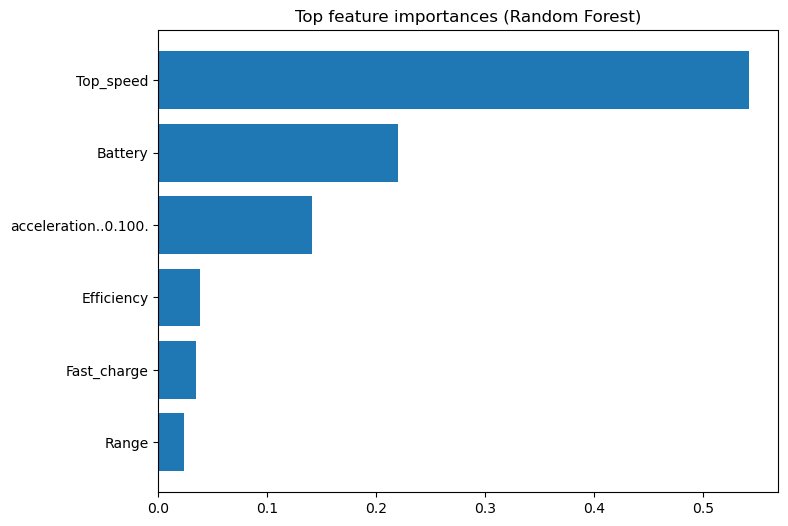

Model, scaler and feature list saved to ../model


In [38]:
# ONE-CELL: robust cleaning, train/test, models, metrics, save model
import os
import pandas as pd
import numpy as np

# --- PARAMETERS: change only if file name differs ---
DATA_PATH = "../data/EV_cars.csv"   # or "data/EV_cars.csv" depending on your working dir
TARGET = "Price.DE."
MODEL_DIR = "../model"             # will be created if missing

# --- 1) load ---
df = pd.read_csv(DATA_PATH)

# --- 2) normalize column names & inspect ---
df.columns = df.columns.str.strip()
print("Columns:", list(df.columns))
print("Initial shape:", df.shape)

# --- 3) drop rows with missing target immediately ---
df = df.dropna(subset=[TARGET])
print("After dropping missing target shape:", df.shape)

# --- 4) safe-clean common columns (convert to numeric if possible) ---
def safe_clean_numeric(col, remove_list=None):
    if col not in df.columns:
        return
    s = df[col].astype(str)
    if remove_list:
        for token in remove_list:
            s = s.str.replace(token, '', regex=False)
    # remove spaces and non-digit punctuation except dot and minus
    s = s.str.replace(r'[^\d\.\-]', '', regex=True)
    # convert to numeric, coerce errors to NaN
    df[col] = pd.to_numeric(s, errors='coerce')

# apply safe cleaning to known textual numeric columns
safe_clean_numeric("Range", remove_list=["km","km/h"," Km"," KM"])
safe_clean_numeric("Battery", remove_list=["kWh","kwh"])
safe_clean_numeric("Top_speed", remove_list=["km/h","kmh"])
safe_clean_numeric("Fast_charge", remove_list=["kW","kwh","kW/h","kW"])
# note: if your Fast_charge col uses different tokens, the generic pass below will still try to coerce numeric

# also try generic attempts for other likely numeric columns
for col in ["Efficiency", "acceleration..0.100.", TARGET]:
    if col in df.columns:
        # remove common text like 'Wh/km', ' sec', '€', ',' etc
        s = df[col].astype(str).str.replace('€','', regex=False).str.replace('Wh/km','', regex=False).str.replace(' sec','', regex=False)
        s = s.str.replace(',','', regex=False).str.replace(' ', '', regex=False)
        s = s.str.replace(r'[^\d\.\-]', '', regex=True)
        df[col] = pd.to_numeric(s, errors='coerce')

# If any above names differ in your file, we will still handle in steps below

# --- 5) strip whitespace from string columns and fix column names again ---
df.columns = df.columns.str.strip()
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()

# --- 6) Convert boolean columns to int (so sklearn accepts them) ---
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
if bool_cols:
    df[bool_cols] = df[bool_cols].astype(int)

# --- 7) Identify object columns that are not numeric and decide encoding ---
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
# drop URL-like columns that are useless
drop_candidates = [c for c in obj_cols if 'link' in c.lower() or 'url' in c.lower()]
if drop_candidates:
    df = df.drop(columns=drop_candidates, errors='ignore')
    print("Dropped URL-like columns:", drop_candidates)

# For the remaining object cols, do safe label encoding if few unique values, otherwise drop
from sklearn.preprocessing import LabelEncoder

to_label = []
to_drop = []
for c in df.select_dtypes(include=['object']).columns:
    nunique = df[c].nunique(dropna=True)
    if nunique <= 50:         # safe to label encode small-cardinality columns (like Car_name)
        to_label.append(c)
    else:
        # if very high-cardinality (like full-text), drop it
        to_drop.append(c)

if to_drop:
    print("Dropping high-cardinality columns:", to_drop)
    df = df.drop(columns=to_drop, errors='ignore')

# Apply label encoding for small-card columns
le_map = {}
for c in to_label:
    le = LabelEncoder()
    df[c] = df[c].fillna("___NA___")
    try:
        df[c] = le.fit_transform(df[c].astype(str))
        le_map[c] = le
    except Exception as e:
        print(f"Label encoding failed for {c}: {e}")
        df = df.drop(columns=[c], errors='ignore')

# --- 8) Final numeric conversion: try to coerce any remaining object columns to numeric ---
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[^\d\.\-]','', regex=True), errors='coerce')

# --- 9) Remove rows with any NaN now (only keep fully numeric rows for modelling) ---
print("NaN counts before drop:", df.isnull().sum().sort_values(ascending=False).head(10))
df = df.dropna()
print("Shape after dropna:", df.shape)

# --- 10) Prepare X, y ---
if TARGET not in df.columns:
    raise RuntimeError(f"Target column {TARGET} not found after cleaning. Columns: {df.columns.tolist()}")
X = df.drop(columns=[TARGET])
y = df[TARGET]

# final safety: ensure all X columns numeric
non_numeric = [c for c in X.columns if not pd.api.types.is_numeric_dtype(X[c])]
if non_numeric:
    print("Non-numeric columns still present (will be dropped):", non_numeric)
    X = X.drop(columns=non_numeric)

# --- 11) train-test split ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Final shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# --- 12) Basic scaling (optional) - we will not scale for tree model but do for linear regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 13) Train Linear Regression ---
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# --- 14) Train Random Forest ---
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- 15) Metrics ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("\nLinear Regression Metrics")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

print("\nRandom Forest Metrics")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

# --- 16) Feature importance plot for top features ---
import matplotlib.pyplot as plt
feat_importances = rf.feature_importances_
feat_names = X.columns
# get top 15
indices = np.argsort(feat_importances)[-15:]
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), feat_importances[indices])
plt.yticks(range(len(indices)), feat_names[indices])
plt.title("Top feature importances (Random Forest)")
plt.show()

# --- 17) save model & scaler & feature list ---
os.makedirs(MODEL_DIR, exist_ok=True)
import joblib
joblib.dump(rf, os.path.join(MODEL_DIR, "ev_price_model.pkl"))
joblib.dump(scaler, os.path.join(MODEL_DIR, "scaler.pkl"))
joblib.dump(list(X.columns), os.path.join(MODEL_DIR, "model_features.pkl"))
print("Model, scaler and feature list saved to", MODEL_DIR)


In [39]:
# Define target & features
X = df.drop("Price.DE.", axis=1)
y = df["Price.DE."]


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 12842.717812456172
RMSE: 16942.653850495568
R2 Score: 0.699029061664054


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MAE: 6908.458911981568
RMSE: 10529.975654264314
R2 Score: 0.8837437204709144


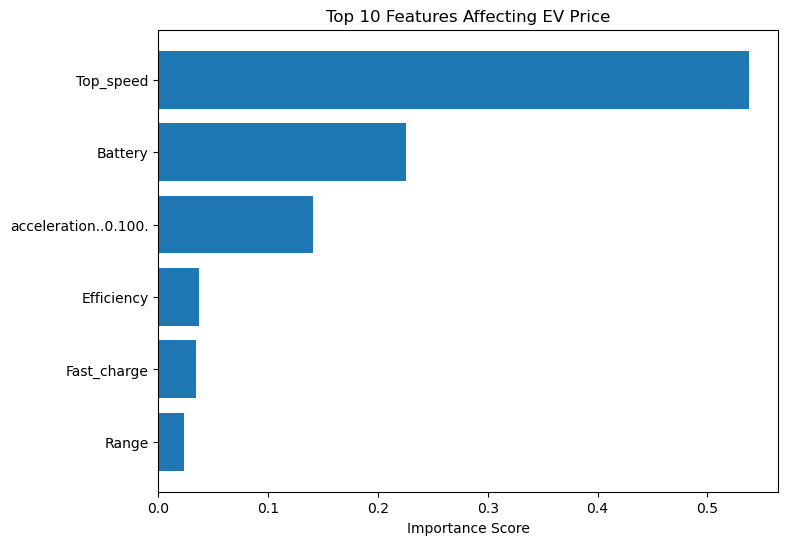

In [44]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,6))
plt.barh(np.array(X.columns)[indices], importances[indices])
plt.title("Top 10 Features Affecting EV Price")
plt.xlabel("Importance Score")
plt.show()


In [45]:
import joblib

joblib.dump(rf, "../model/ev_price_model.pkl")   # saves the model
joblib.dump(X.columns, "../model/model_features.pkl")  # saves features order


['../model/model_features.pkl']